In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib.patches import FancyArrowPatch

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skewnorm
from scipy.special import erf
import matplotlib.cm as cm
import matplotlib


from matplotlib.cm import ScalarMappable
import matplotlib
import matplotlib.colors as colors
import pickle

import os
import sys

In [2]:

# Get the current working directory
current_dir = os.getcwd()

parent_dir = os.path.abspath(os.path.join(current_dir, ".."))

# Navigate to the sibling directory
sibling_dir = os.path.join(parent_dir, "00_analytical_function_setup")

# Add the sibling directory to sys.path for importing
if sibling_dir not in sys.path:
    sys.path.append(sibling_dir)

# Import the module from 00_analytical_function_setup
import analytical as a

## Load data

In [3]:

# Loading the saved output
with open('data/reference_landscape_reward.pkl', 'rb') as file:
    reference_landscape = pickle.load(file)

# Loading the saved output
with open('data/reference_threshold_vec.pkl', 'rb') as file:
    reference_threshold = pickle.load(file)


In [4]:
group_hist_id_list=[20240427065011,
20240429092444,
20240501123044,
20240503151949,
20240505182320,
20240507213440,
20240510013816,
20240512045922,
20240514082754]

upward_id_list=[20240428141538,
20240430170830,
20240502201155,
20240504232139,
20240507015757,
20240509060001,
20240511091902,
20240513131410,
20240515163445]

In [5]:
def process_files(group_hist_id_list,end_string):
    """
    Processes a list of simulation IDs and loads simulation results for all-cohort comparison and upward social comparison

    Parameters:
    -----------
    group_hist_id_list : list of str
        A list of simulation IDs
    
    end_string : str
        "group_hist" for all-cohort comparison or "group_hist_upward" for upward social comparison.

    Returns:
    --------
    dict
        A dictionary where each key is a group ID from `group_hist_id_list`, and each value is a tuple containing:
        - threshold_vec (list): Threshold values obtained from the simulation results.
        - corr_val (float): Correlation value derived from the simulation results.
        - simresults_group (DataFrame or similar): Simulation results for the group.

    Notes:
    ------
    - This function assumes the existence of CSV files in the 'data' directory, named in the format 
      'Reward_Cumulative_{group_id}_{end_string}.csv'.
    - The `df_to_simresults` function from the `a` module is used to process the data. 
      It is expected to return `threshold_vec`, `corr_val`, and `simresults_group`.
    """
    results = {}
    for group_id in group_hist_id_list:
        file_path = f'data\\Reward_Cumulative_{group_id}_{end_string}.csv'
        df_group = pd.read_csv(file_path)
        threshold_vec, corr_val, simresults_group = a.df_to_simresults(df_group, num_cols=1)
        results[group_id] = (threshold_vec, corr_val, simresults_group)
    return results

In [6]:
group_hist_results=process_files(group_hist_id_list,'group_hist')

In [7]:
upward_results=process_files(upward_id_list,'group_hist_upward')

## Plotting

In [8]:
#define colors
warmorange='#f5c72f'
softpurple="#a489f5"
myblack = "#222222"
# Set font globally
matplotlib.rcParams['font.family'] = 'Helvetica, Arial, sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Helvetica, Arial, sans-serif'  # Fallback to Arial if Helvetica is not available
dpi=300

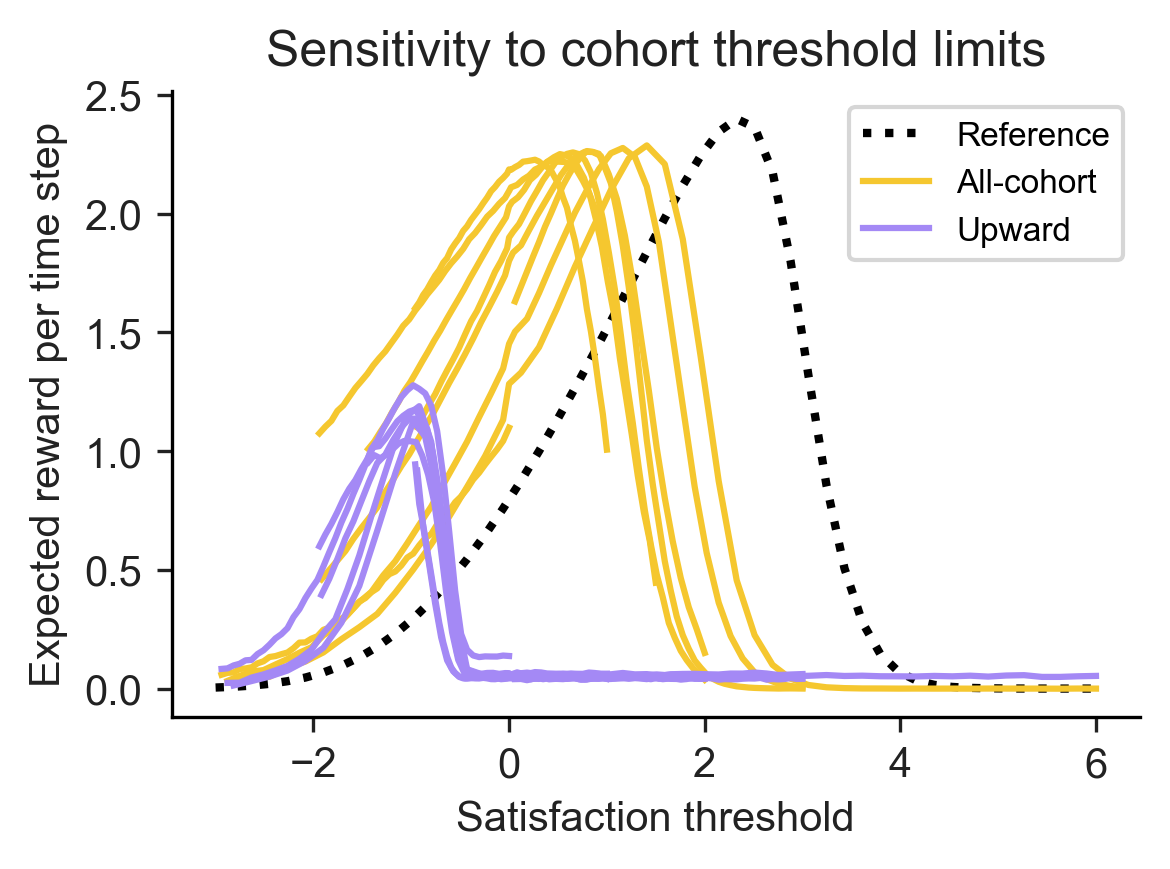

In [9]:
# Create a figure with two subplots side by side
fig = plt.figure(figsize=(4, 3), dpi=dpi)
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax1 = fig.add_subplot(1, 1, 1)

# Plot the reference landscape
ax1.plot(reference_threshold, reference_landscape, linestyle=':', color='k', linewidth=2, label='Reference')

# Plot group history results
for id in group_hist_id_list:
    threshold_vec, corr_val, simresults = group_hist_results[id]
    ax1.plot(threshold_vec, simresults[:, 0], color=warmorange, label='All-cohort' if id == group_hist_id_list[0] else "")

# Plot upward results
for id in upward_id_list:
    threshold_vec, corr_val, simresults = upward_results[id]
    ax1.plot(threshold_vec, simresults[:, 0], color=softpurple, label='Upward' if id == upward_id_list[0] else "")

# Remove duplicate legend entries
handles, labels = ax1.get_legend_handles_labels()
unique_labels = {label: handle for handle, label in zip(handles, labels)}  # Use a dictionary to remove duplicates
ax1.legend(unique_labels.values(), unique_labels.keys(), fontsize=8, loc='upper right')

sns.despine()

# Add labels, title, and formatting
ax1.set_xlabel('Satisfaction threshold', fontsize=10, color=myblack)
ax1.set_title('Sensitivity to cohort threshold limits', fontsize=12, color=myblack)
ax1.set_ylabel("Expected reward per time step", fontsize=10, color=myblack)
ax1.tick_params(colors=myblack)

plt.tight_layout()
plt.savefig('output/sensitivity_to_cohort_threshold.pdf', format='pdf', bbox_inches='tight')
plt.show()


In [10]:
cohort_group_id_list=[20240516000055,
20240518223445,
20240523111622,
20240523161617,
20240427065011]

cohort_upward_id_list=[20240516103541,
20240523081611,
20240523151231,
20240428141538]

In [11]:
cohort_group_hist_results=process_files(cohort_group_id_list,'group_hist')
cohort_upward_results=process_files(cohort_upward_id_list,'group_hist_upward')

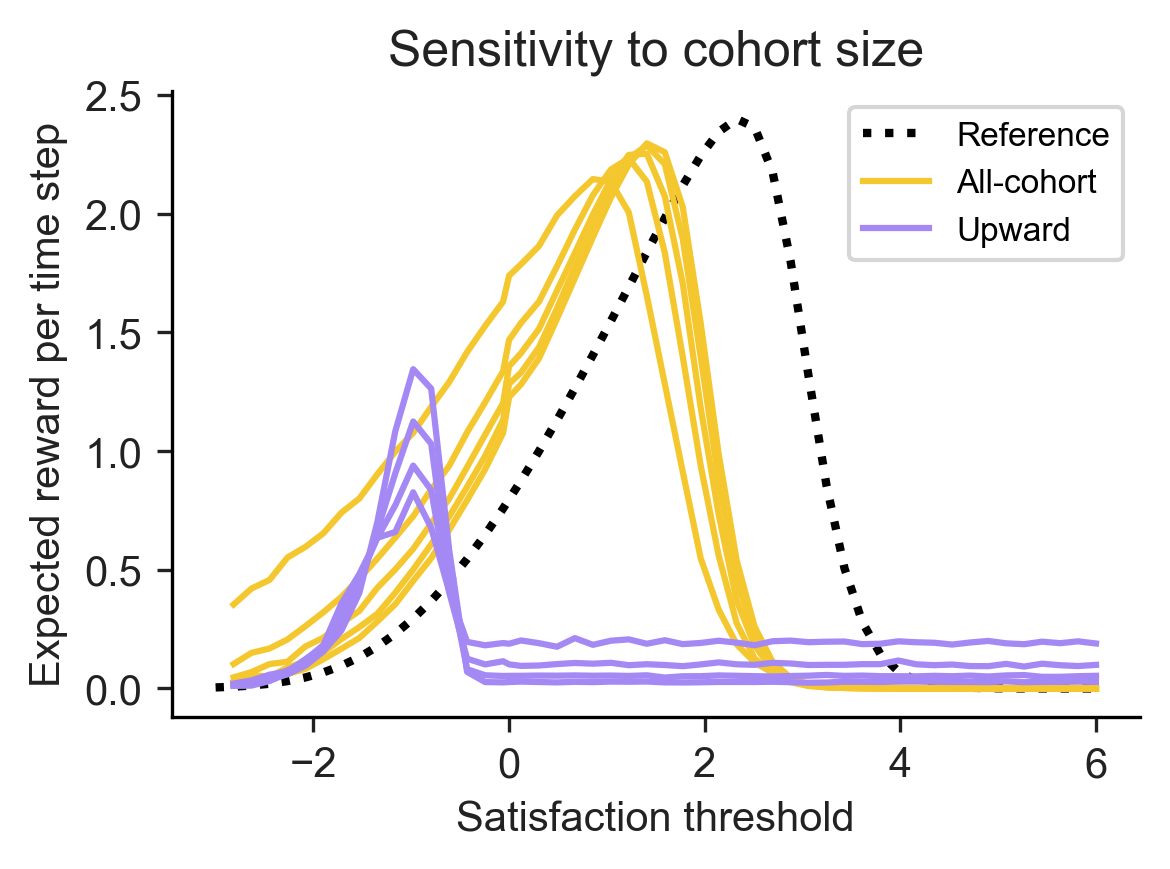

In [12]:
# Create a figure with two subplots side by side
fig = plt.figure(figsize=(4, 3), dpi=dpi)
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax1 = fig.add_subplot(1, 1, 1)

# Plot the reference landscape
ax1.plot(reference_threshold, reference_landscape, linestyle=':', color='k', linewidth=2, label='Reference')

# Plot cohort group history results
for id in cohort_group_id_list:
    threshold_vec, corr_val, simresults = cohort_group_hist_results[id]
    ax1.plot(threshold_vec, simresults[:, 0], color=warmorange, label='All-cohort' if id == cohort_group_id_list[0] else "")

# Plot cohort upward results
for id in cohort_upward_id_list:
    threshold_vec, corr_val, simresults = cohort_upward_results[id]
    ax1.plot(threshold_vec, simresults[:, 0], color=softpurple, label='Upward' if id == cohort_upward_id_list[0] else "")

# Remove duplicate legend entries
handles, labels = ax1.get_legend_handles_labels()
unique_labels = {label: handle for handle, label in zip(handles, labels)}  # Use a dictionary to remove duplicates
ax1.legend(unique_labels.values(), unique_labels.keys(), fontsize=8, loc='best')

sns.despine()

# Add labels, title, and formatting
ax1.set_xlabel('Satisfaction threshold', fontsize=10, color=myblack)
ax1.set_title('Sensitivity to cohort size', fontsize=12, color=myblack)
ax1.set_ylabel("Expected reward per time step", fontsize=10, color=myblack)
ax1.tick_params(colors=myblack)

plt.tight_layout()
plt.savefig('output/sensitivity_to_cohort_size.pdf', format='pdf', bbox_inches='tight')
plt.show()
